In [34]:
!pip install tensorflow-gpu==2.10.0

In [35]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [37]:
da = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [38]:
da.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
X = da.iloc[:,3:13]
y = da.iloc[:, 13:]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [40]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [41]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [42]:
## concatenate it with the database
X = X.drop(['Geography','Gender'], axis=1)

In [43]:
X = pd.concat([X, geography, gender], axis=1)

In [44]:
# spliting dataset into training and test data
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
## feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_train.shape

(8000, 11)

In [20]:
## part two now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [22]:
classifier = Sequential()

In [24]:
## adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [32]:
## adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [72]:
## adding the second hidden layer
classifier.add(Dense(units=7, activation='relu'))


In [73]:
## adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [74]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [76]:
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [77]:
model_history = classifier.fit(X_train, y_train, callbacks=early_stop, validation_split=0.33, batch_size=10, epochs=1000)

Epoch 1/1000
536/536 [==============================] - 4s 4ms/step - loss: 0.5514 - accuracy: 0.7953 - val_loss: 0.4621 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4339 - accuracy: 0.7962 - val_loss: 0.4118 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4095 - accuracy: 0.7962 - val_loss: 0.4025 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4020 - accuracy: 0.7962 - val_loss: 0.4022 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3902 - accuracy: 0.7962 - val_loss: 0.3914 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3876 - accuracy: 0.8322 - val_loss: 0.3903 - val_accuracy: 0.8429
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3872 - accuracy: 0.8477 - val_loss: 0.3878 - val_accuracy:

In [80]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


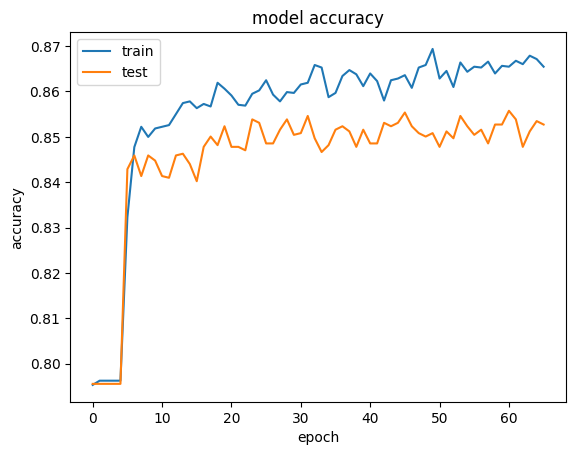

In [81]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

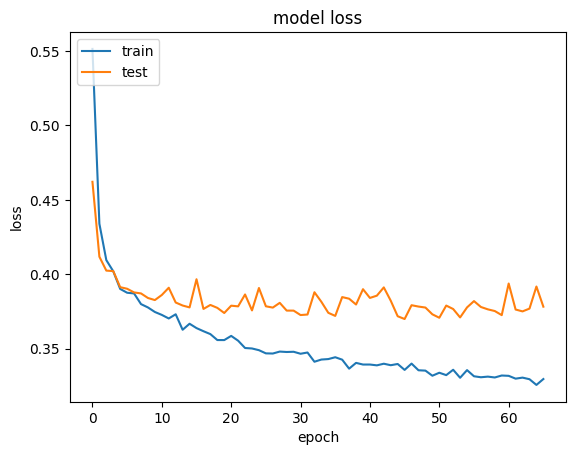

In [82]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [83]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1464,  131],
       [ 181,  224]])

In [85]:

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [86]:
score

0.844